In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
mean = [1,0]
cov = np.eye(2)
x0 = np.random.multivariate_normal(mean,cov,500)
y0 = np.zeros(500)
x1 = np.random.multivariate_normal([5,4],cov,500)
y1 = np.ones(500)
x0 = np.array(x0)
x1 = np.array(x1)
X = np.concatenate((x0,x1))
Y = np.concatenate((y0,y1))
X,Y = shuffle(X,Y)

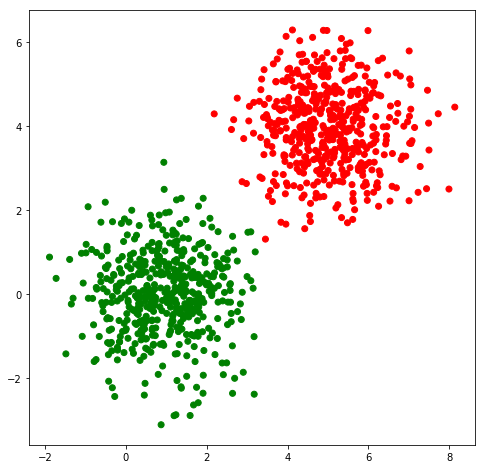

In [3]:
colors = ['r' if i == 1 else 'g' for i in Y[:]]
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],color = colors)
plt.show()

In [4]:
x = tf.placeholder(dtype=tf.float32,shape= [None,2],name = "input")
y = tf.placeholder(dtype=tf.float32,shape = [None,1],name = "label")

In [5]:
para = {
    "W1":tf.Variable(initial_value=tf.random_normal([2,1]),dtype=tf.float32,name="W1"),
    "B1":tf.Variable(initial_value=tf.zeros([1]),dtype=tf.float32,name="B1")
}

In [6]:
lay_1 = tf.nn.sigmoid(tf.matmul(x,para["W1"])+para["B1"])
cost = tf.reduce_mean(tf.square(y - lay_1))
opti = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [7]:
init = tf.global_variables_initializer()
saver = tf.train.Saver(max_to_keep=3)
batch_size = 20
inters = 50
Y = np.reshape(Y,[-1,1])
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(50):
        for inter in range(inters):
            _,loss = sess.run([opti,cost],feed_dict = {x:X[inter*batch_size:(inter+1)*batch_size,:],y:Y[inter*batch_size:(inter+1)*batch_size]})
            if inter % 49 == 0 and inter != 0:
                print("epoch:{0},Cost{1}".format(inter+inters*inter,loss))
                saver.save(sess,"LinearSave/linear.ckpt",global_step =inter+inters*inter )
    k = sess.run(para["W1"])[0]/sess.run(para["W1"])[1]
    b = sess.run(para["B1"])/sess.run(para["W1"])[1]
    print(k,b)

epoch:2499,Cost0.10679290443658829
epoch:2499,Cost0.056215979158878326
epoch:2499,Cost0.03748110681772232
epoch:2499,Cost0.02813243307173252
epoch:2499,Cost0.02249116078019142
epoch:2499,Cost0.018700305372476578
epoch:2499,Cost0.01597433164715767
epoch:2499,Cost0.01391997653990984
epoch:2499,Cost0.012317036278545856
epoch:2499,Cost0.01103215478360653
epoch:2499,Cost0.009979731403291225
epoch:2499,Cost0.009102309122681618
epoch:2499,Cost0.008359855972230434
epoch:2499,Cost0.007723639719188213
epoch:2499,Cost0.0071725547313690186
epoch:2499,Cost0.00669070053845644
epoch:2499,Cost0.006265897303819656
epoch:2499,Cost0.005888662301003933
epoch:2499,Cost0.005551491864025593
epoch:2499,Cost0.005248379427939653
epoch:2499,Cost0.004974464885890484
epoch:2499,Cost0.004725768696516752
epoch:2499,Cost0.004498991183936596
epoch:2499,Cost0.004291389603167772
epoch:2499,Cost0.004100660793483257
epoch:2499,Cost0.0039248475804924965
epoch:2499,Cost0.0037622973322868347
epoch:2499,Cost0.0036115851253271

INFO:tensorflow:Restoring parameters from LinearSave/linear.ckpt-2499
[0.7287384] [-3.9013865]


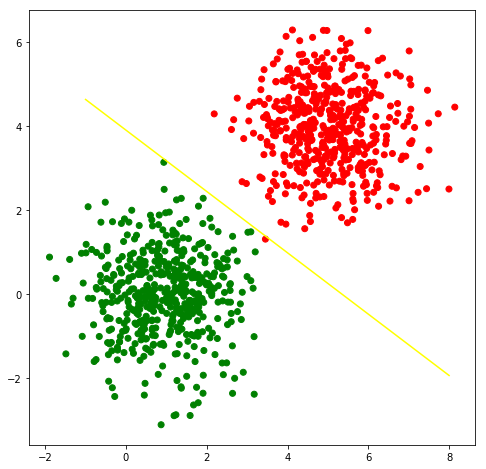

In [8]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,"LinearSave/linear.ckpt-2499")
    xx = np.linspace(-1,8,100)
    yy = -xx*(sess.run(para["W1"])[0]/sess.run(para["W1"])[1])-sess.run(para["B1"])/sess.run(para["W1"])[1]
    k = sess.run(para["W1"])[0]/sess.run(para["W1"])[1]
    b = sess.run(para["B1"])/sess.run(para["W1"])[1]
print(k,b)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c = colors)
plt.plot(xx,yy,c = "yellow")
plt.show()